In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

In [2]:
sigma = 8
path = f'runs/est_sigma_{sigma}/'
i = 9

with open(path+f'results_array_{i}.pkl', 'rb') as f:
    results_array = pickle.load(f)

In [3]:
summary = results_array[0].summary2()

summary.tables[1].loc['const']

Coef.       -8.087825
Std.Err.     0.086748
z          -93.234038
P>|z|        0.000000
[0.025      -8.257847
0.975]      -7.917803
Name: const, dtype: float64

-8.087824834340436
-8.001118533377456
-7.918551817942021
-7.867951920726017
-7.969683167269742
-7.983473006572104
-7.910003108316297
-7.955849234196348
-7.982730679894499
-7.785768585838543


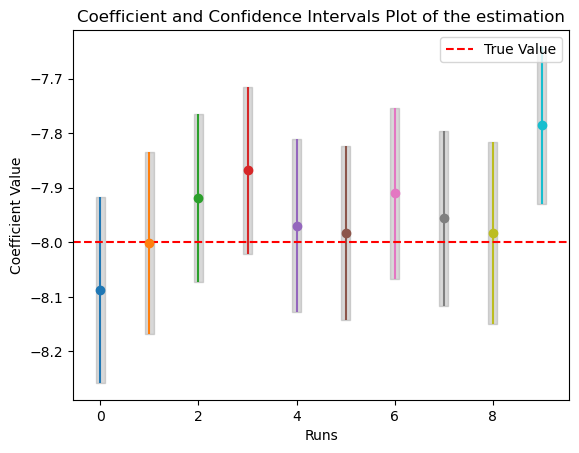

In [4]:
import matplotlib.pyplot as plt

# Assume results_array is your list of Pandas Series
fig, ax = plt.subplots()

# Extract and plot each series
for i, summary in enumerate(results_array):
    result = summary.summary2().tables[1].loc['const']
    coef = result.loc['Coef.']
    lower_bound = result.loc['[0.025']
    upper_bound = result.loc['0.975]']
    print(coef)
    
    # Plotting the coefficient with error bars
    #ax.errorbar(i, coef, yerr=[[coef - lower_bound], [upper_bound - coef]], fmt='o', label=f'Series {i+1}')
    ax.errorbar(i, coef, yerr=[[coef - lower_bound], [upper_bound - coef]], fmt='o')
    
    # Optionally, fill between the confidence interval
    ax.fill_between([i-0.1, i+0.1], lower_bound, upper_bound, color='gray', alpha=0.3)

# Add horizontal line at -4
ax.axhline(y=-sigma, color='r', linestyle='--', label='True Value')

# Setting labels and title
ax.set_xlabel('Runs')
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficient and Confidence Intervals Plot of the estimation')

# Add legend
ax.legend()

# Show plot
plt.show()


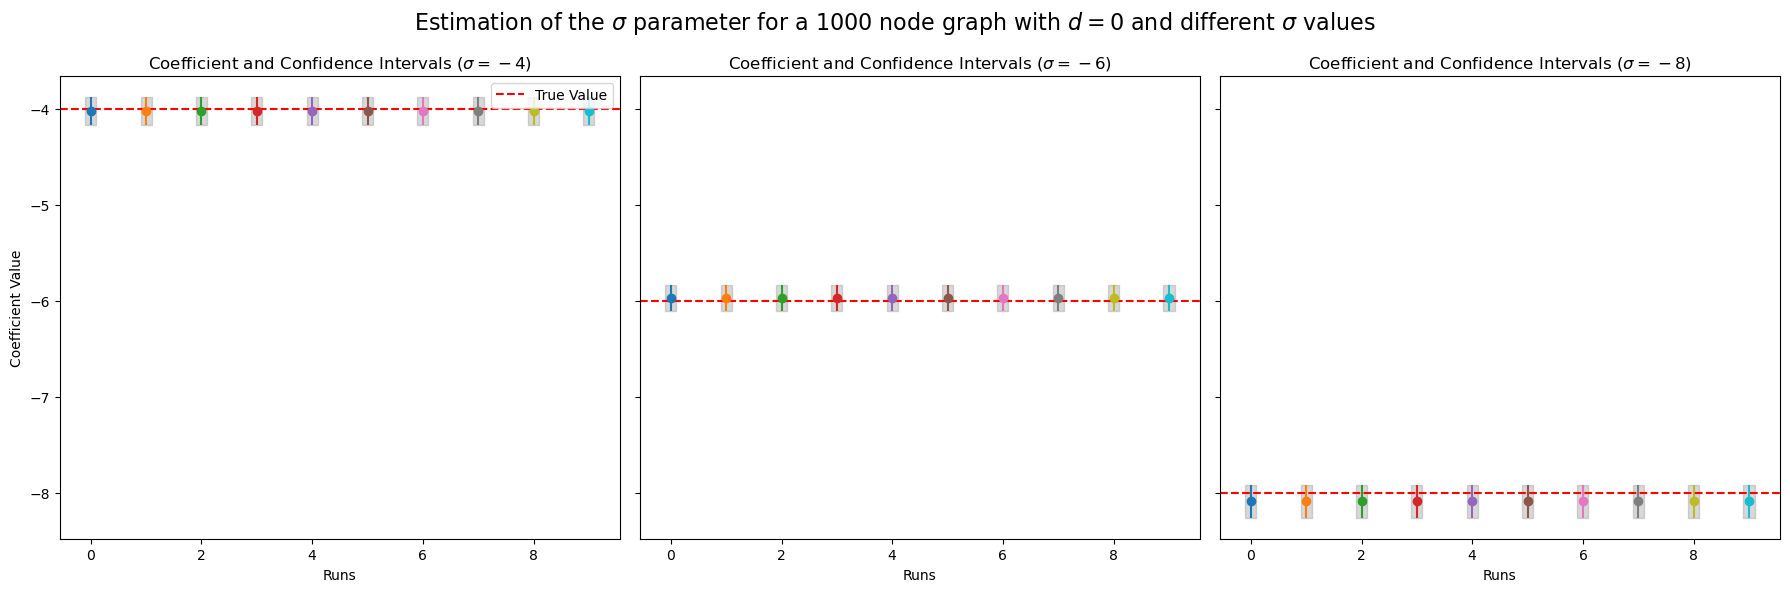

In [9]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

sigmas = [4,6,8]  # Example sigma values
runs = 10  # Example number of runs for each sigma

fig, axs = plt.subplots(1, len(sigmas), figsize=(18, 6), sharey=True)

for j, sigma in enumerate(sigmas):
    path = f'runs/est_sigma_{sigma}/'
    
    for i in range(runs):
        with open(path + f'results_array_{i}.pkl', 'rb') as f:
            results_array = pickle.load(f)
            
        result = results_array[0].summary2().tables[1].loc['const']
        coef = result.loc['Coef.']
        lower_bound = result.loc['[0.025']
        upper_bound = result.loc['0.975]']
        
        # Plotting the coefficient with error bars
        axs[j].errorbar(i, coef, yerr=[[coef - lower_bound], [upper_bound - coef]], fmt='o')
        
        # Optionally, fill between the confidence interval
        axs[j].fill_between([i - 0.1, i + 0.1], lower_bound, upper_bound, color='gray', alpha=0.3)
    
    # Add horizontal line at -sigma
    axs[j].axhline(y=-sigma, color='r', linestyle='--', label='True Value')
    
    # Setting labels and title
    axs[j].set_xlabel('Runs')
    axs[j].set_title(f'Coefficient and Confidence Intervals ($\sigma=-{sigma}$)')

# Setting the y-axis label for the first subplot
axs[0].set_ylabel('Coefficient Value')

# Adding legend to the first subplot
axs[0].legend()
fig.suptitle(f'Estimation of the $\sigma$ parameter for a 1000 node graph with $d=0$ and different $\sigma$ values', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


# Analysis of D parameter

In [10]:
sigma = 8
path = f'runs/d_sigma_{sigma}/'
i = 4

d_est = 0
d_real = 0

with open(path+f'results_array_iter_{i}_dest_{d_est}_dreal_{d_real}.pkl', 'rb') as f:
    results_array = pickle.load(f)

In [11]:
results_array

In [20]:
def plot_metrics_d(d_real, d_est_values, i, figsize=(20, 6)):
    titles = ['AIC Values', 'BIC Values', 'Log Likelihood']
    metrics = ['aic', 'bic', 'llf' ]
    fig, axs = plt.subplots(1, len(titles), figsize=figsize, sharey=False)
    for ax, title, metric in zip(axs, titles, metrics):
        for d_est in d_est_values:
            file_name = f'results_array_iter_{i}_dest_{d_est}_dreal_{d_real}.pkl'
            file_path = os.path.join(path, file_name)
            
            if os.path.exists(file_path):
                with open(file_path, 'rb') as f:
                    results_array = pickle.load(f)
                    
                values = [getattr(result, metric) for result in results_array]
                
                # Plot the metric values with some jitter for better visibility
                x_values = [d_est + (0.1 * (k - 2)) for k in range(len(values))]
                ax.plot(x_values, values, 'o', label=f'd_est={d_est}')
            else:
                print(f"File not found: {file_path}")
        
        ax.set_xlabel('$d$ Values')
        ax.set_title(f'{title} for the real $d={d_real}$ and $\sigma=-{sigma}$')
        
        ax.set_xticks(d_est_values)
        ax.legend()

    axs[0].set_ylabel('AIC')
    axs[1].set_ylabel('BIC')
    axs[2].set_ylabel('Log Likelihood')

    # Show plot
    plt.tight_layout()
    plt.show()


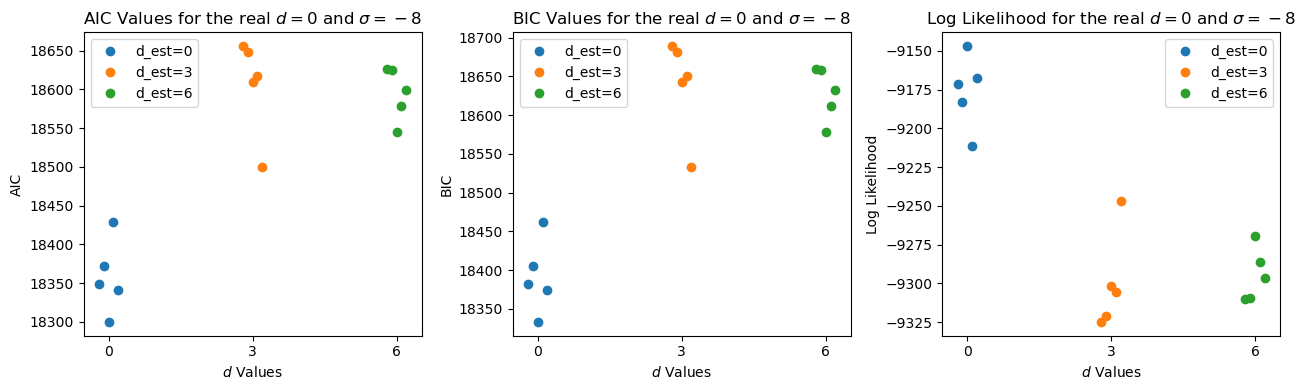

In [21]:
d_est_values = [0, 3, 6]
d_real = 0
plot_metrics_d(d_real=d_real, d_est_values=d_est_values, i = 4, figsize=(13,4))

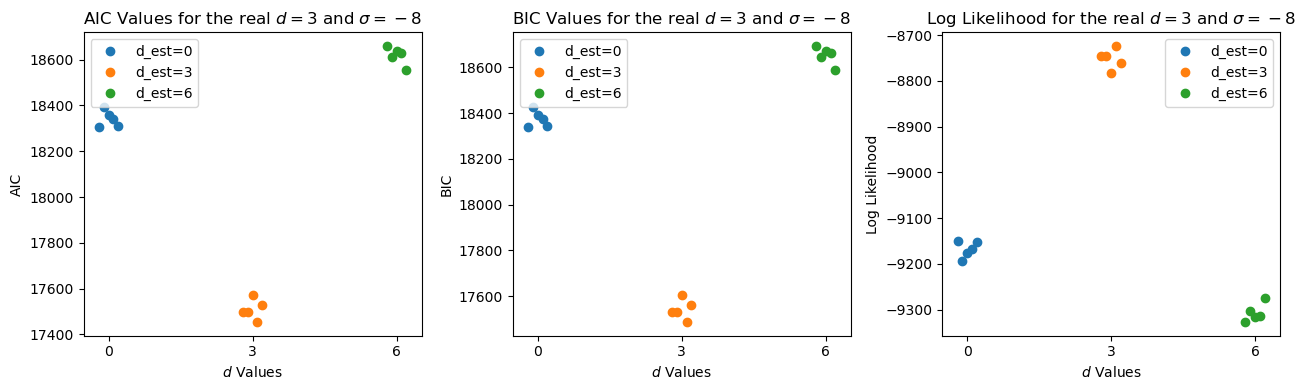

In [22]:
d_est_values = [0, 3, 6]
d_real = 3
plot_metrics_d(d_real=d_real, d_est_values=d_est_values, i=4, figsize=(13,4))

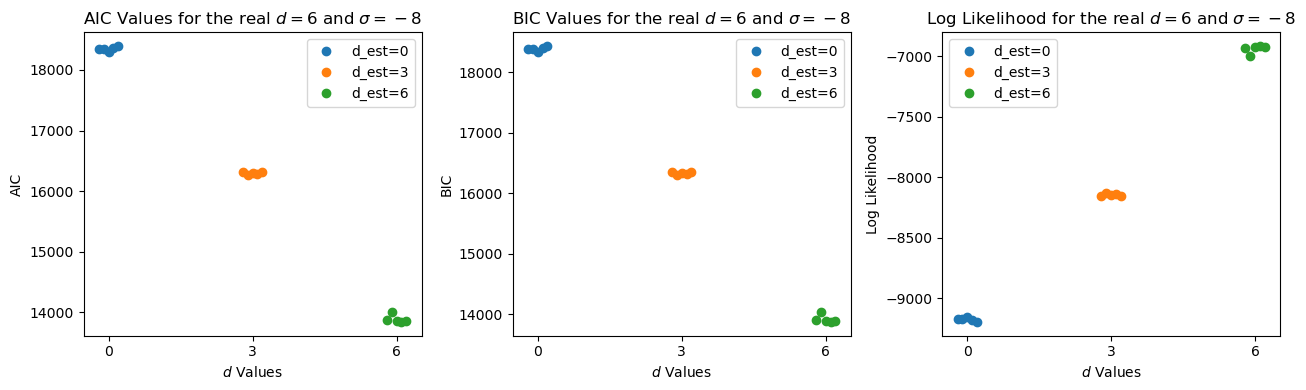

In [23]:
#d_est_values = [0, 3, 6, 10]
#i=2

d_est_values = [0, 3, 6]
i=4
d_real = 6
plot_metrics_d(d_real=d_real, d_est_values=d_est_values, i=i, figsize=(13,4))